In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download adacslicml/breast-histopathology-images

 95% 152M/159M [00:01<00:00, 76.8MB/s]
100% 159M/159M [00:01<00:00, 89.2MB/s]


In [ ]:
! unzip breast-histopathology-images

Streaming output truncated to the last 5000 lines.
  inflating: BreastCancer/train/1_Cancer/9077_idx5_x1701_y1351_class1.png  
  inflating: BreastCancer/train/1_Cancer/9077_idx5_x1751_y1451_class1.png  
  inflating: BreastCancer/train/1_Cancer/9077_idx5_x1751_y1851_class1.png  
  inflating: BreastCancer/train/1_Cancer/9077_idx5_x1751_y2101_class1.png  
  inflating: BreastCancer/train/1_Cancer/9077_idx5_x1751_y501_class1.png  
  inflating: BreastCancer/train/1_Cancer/9077_idx5_x1801_y1801_class1.png  
  inflating: BreastCancer/train/1_Cancer/9077_idx5_x1801_y1901_class1.png  
  inflating: BreastCancer/train/1_Cancer/9077_idx5_x1851_y2001_class1.png  
  inflating: BreastCancer/train/1_Cancer/9077_idx5_x1851_y2051_class1.png  
  inflating: BreastCancer/train/1_Cancer/9077_idx5_x1851_y601_class1.png  
  inflating: BreastCancer/train/1_Cancer/9077_idx5_x1851_y851_class1.png  
  inflating: BreastCancer/train/1_Cancer/9077_idx5_x1901_y1001_class1.png  
  inflating: BreastCancer/train/1_Cancer

Sample Data

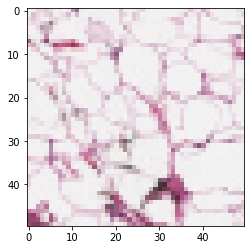

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('BreastCancer/train/0_NoCancer/9383_idx5_x951_y1901_class0.png')
imgplot = plt.imshow(img)
plt.show()

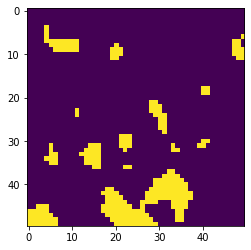

In [ ]:
import cv2
img = cv2.imread('BreastCancer/train/0_NoCancer/9383_idx5_x951_y1901_class0.png',0)
img = cv2.GaussianBlur(img, (5, 5), 0)
ret, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
imgplot = plt.imshow(img)
plt.show()

Load dataset and Extract Features using VGG19

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
model = VGG19(weights='imagenet', include_top=False)

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
import numpy as np
import cv2
import os
from scipy import ndimage
from scipy.spatial import distance
from sklearn.cluster import KMeans
from google.colab.patches import cv2_imshow


# Return a dictionary that holds all images category by category. 
def load_images_from_folder(folder):
    img_path = '/content/BreastCancer/train/0_NoCancer/10253_idx5_x1001_y1001_class0.png'
    img = image.load_img(img_path, target_size = (50,50))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
#x = preprocess_inputs(x)

    f = model.predict(x)
    print(f.shape)
    images = {}
    #features = []
    ct = 0
    for filename in os.listdir(folder):
        category = []
        path = folder + "/" + filename
        for cat in os.listdir(path)[:560]:
          ct += 1
          img = cv2.imread(path + "/" + cat,0)
          img = cv2.GaussianBlur(img, (5, 5), 0)
          ret, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
          if img is not None:
            name = folder.split('/')[-1]
            #print(str(filename))
            pt = str('/content/BreastCancer/' + name + '/' + filename + '/'+ cat)
            print(pt)
            #cv2.imwrite(pt, img)
            img = image.load_img(pt, target_size = (50,50))
            x = image.img_to_array(img)
            x = np.expand_dims(x, axis=0)
            ft = model.predict(x)
            f = np.vstack([f,ft])
            print(f.shape)
            #category.append(img)
          #images[filename] = category
    #cv2_imshow(img)
    #print('image ->' + cat)
    print(ct)
    return f


features_train = load_images_from_folder('BreastCancer/train')

(1, 1, 1, 512)
/content/BreastCancer/train/1_Cancer/14155_idx5_x3001_y101_class1.png
(2, 1, 1, 512)
/content/BreastCancer/train/1_Cancer/15472_idx5_x1501_y1251_class1.png
(3, 1, 1, 512)
/content/BreastCancer/train/1_Cancer/9267_idx5_x2151_y1401_class1.png
(4, 1, 1, 512)
/content/BreastCancer/train/1_Cancer/9266_idx5_x1951_y1301_class1.png
(5, 1, 1, 512)
/content/BreastCancer/train/1_Cancer/9323_idx5_x1351_y1651_class1.png
(6, 1, 1, 512)
/content/BreastCancer/train/1_Cancer/16555_idx5_x951_y1001_class1.png
(7, 1, 1, 512)
/content/BreastCancer/train/1_Cancer/14154_idx5_x2351_y951_class1.png
(8, 1, 1, 512)
/content/BreastCancer/train/1_Cancer/9227_idx5_x951_y1651_class1.png
(9, 1, 1, 512)
/content/BreastCancer/train/1_Cancer/10308_idx5_x1301_y2351_class1.png
(10, 1, 1, 512)
/content/BreastCancer/train/1_Cancer/10303_idx5_x1201_y1401_class1.png
(11, 1, 1, 512)
/content/BreastCancer/train/1_Cancer/8863_idx5_x1351_y1701_class1.png
(12, 1, 1, 512)
/content/BreastCancer/train/1_Cancer/9258_idx

In [ ]:
import numpy as np
import cv2
import os
from scipy import ndimage
from scipy.spatial import distance
from sklearn.cluster import KMeans
from google.colab.patches import cv2_imshow


# Return a dictionary that holds all images category by category. 
def load_images_from_folder(folder):
    img_path = '/content/BreastCancer/test/0_NoCancer/10253_idx5_x1101_y401_class0.png'
    img = image.load_img(img_path, target_size = (50,50))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
#x = preprocess_inputs(x)

    f = model.predict(x)
    print(f.shape)
    images = {}
    #features = []
    ct = 0
    for filename in os.listdir(folder):
        category = []
        path = folder + "/" + filename
        for cat in os.listdir(path)[:140]:
          ct += 1
          img = cv2.imread(path + "/" + cat,0)
          img = cv2.GaussianBlur(img, (5, 5), 0)
          ret, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
          if img is not None:
            name = folder.split('/')[-1]
            #print(str(filename))
            pt = str('/content/BreastCancer/' + name + '/' + filename + '/'+ cat)
            print(pt)
            #cv2.imwrite(pt, img)
            img = image.load_img(pt, target_size = (50,50))
            x = image.img_to_array(img)
            x = np.expand_dims(x, axis=0)
            ft = model.predict(x)
            f = np.vstack([f,ft])
            print(f.shape)
            #category.append(img)
          #images[filename] = category
    #cv2_imshow(img)
    #print('image ->' + cat)
    print(ct)
    return f


features_test = load_images_from_folder('BreastCancer/test')

(1, 1, 1, 512)
/content/BreastCancer/test/1_Cancer/12893_idx5_x1151_y2001_class1.png
(2, 1, 1, 512)
/content/BreastCancer/test/1_Cancer/8975_idx5_x1501_y1351_class1.png
(3, 1, 1, 512)
/content/BreastCancer/test/1_Cancer/15471_idx5_x2051_y851_class1.png
(4, 1, 1, 512)
/content/BreastCancer/test/1_Cancer/10308_idx5_x1901_y651_class1.png
(5, 1, 1, 512)
/content/BreastCancer/test/1_Cancer/9324_idx5_x1351_y1001_class1.png
(6, 1, 1, 512)
/content/BreastCancer/test/1_Cancer/15473_idx5_x2101_y1551_class1.png
(7, 1, 1, 512)
/content/BreastCancer/test/1_Cancer/16568_idx5_x1551_y701_class1.png
(8, 1, 1, 512)
/content/BreastCancer/test/1_Cancer/13616_idx5_x1551_y2101_class1.png
(9, 1, 1, 512)
/content/BreastCancer/test/1_Cancer/12823_idx5_x2451_y1501_class1.png
(10, 1, 1, 512)
/content/BreastCancer/test/1_Cancer/12900_idx5_x2201_y1101_class1.png
(11, 1, 1, 512)
/content/BreastCancer/test/1_Cancer/12898_idx5_x1651_y351_class1.png
(12, 1, 1, 512)
/content/BreastCancer/test/1_Cancer/14082_idx5_x1601_

In [ ]:
features_train

array([[[[ 0.       ,  0.       , 11.237001 , ...,  0.       ,
           7.0224104,  0.       ]]],


       [[[ 0.       ,  0.       , 22.513828 , ...,  0.       ,
          11.690717 ,  0.       ]]],


       [[[ 0.       ,  0.       , 11.383212 , ...,  0.       ,
          14.9343815,  0.       ]]],


       ...,


       [[[ 0.       ,  0.       , 22.57951  , ...,  0.       ,
          18.292809 ,  0.       ]]],


       [[[ 0.       ,  0.       , 12.541418 , ...,  0.       ,
          31.60003  ,  0.       ]]],


       [[[ 8.4162035,  0.       , 87.085594 , ...,  0.       ,
          22.004833 ,  0.       ]]]], dtype=float32)

In [ ]:
new_train_ft = np.array(features_train[0][0][0])
new_train_ft.shape

for i in features_train[1:]:
  new_train_ft = np.vstack([new_train_ft,i[0][0]])

new_train_ft.shape

(1121, 512)

In [ ]:
new_test_ft = np.array(features_test[0][0][0])
new_test_ft.shape

for i in features_test[1:]:
  new_test_ft = np.vstack([new_test_ft,i[0][0]])

new_test_ft.shape

(281, 512)

Building the visual dictionary using Kmeans clustering

In [ ]:
def k_means(dataset,num_clusters,max_iter,n_runs):
  '''
  k-means clustering
  The number of clusters to form as well as the number of centroids to generate.
  num_clusters = 50
  Maximum number of iterations of the k-means algorithm for a single run.
  max_iter = 500
  Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive.
  n_runs = 20
  '''
  from sklearn.cluster import KMeans
  kmeans = KMeans(
      n_clusters=num_clusters, init='random',
      n_init=n_runs, max_iter=max_iter, 
      tol=1e-04, random_state=0
  )

  y_pred_km = kmeans.fit_predict(dataset)
  distortion = kmeans.inertia_
  centroids = kmeans.cluster_centers_

  return y_pred_km,centroids,distortion

In [ ]:
num_clusters = 70
max_iter = 500
n_runs = 20  
train_pred,train_centroids,train_distortion = k_means(new_train_ft,num_clusters,max_iter,n_runs)
print("distortion:",train_distortion)
#print(train_centroids.shape)

distortion: 26597744.0


In [ ]:
train_centroids.shape

(70, 512)

In [ ]:
n = 0
train_dict = {}
NoCan = []
Can = []
for i in new_train_ft:
  n += 1
  if(n<=560):
    NoCan.append(i)
  else:
    Can.append(i)
train_dict['0_NoCancer'] = NoCan
train_dict['1_Cancer'] = Can

In [ ]:
n = 0
test_dict = {}
NoCan = []
Can = []
for i in new_test_ft:
  n += 1
  if(n<=140):
    NoCan.append(i)
  else:
    Can.append(i)
test_dict['0_NoCancer'] = NoCan
test_dict['1_Cancer'] = Can

In [ ]:
len(train_dict['0_NoCancer'])

560

Histogram generation 

In [ ]:
def find_index(image, center):
    count = 0
    ind = 0
    for i in range(len(center)):
        if(i == 0):
           count = distance.euclidean(image, center[i]) 
           #count = L1_dist(image, center[i])
        else:
            dist = distance.euclidean(image, center[i]) 
            #dist = L1_dist(image, center[i])
            if(dist < count):
                ind = i
                count = dist
    return ind

def image_class(all_bovw, centers):
    dict_feature = np.array([np.zeros(len(centers))])
    for key,value in all_bovw.items():
        category = []
        print(key)
        ct=0
        for img in value:
            ct+=1
            print(key + '--->'+ str(ct))
            histogram = np.zeros(len(centers))
            nooo = 0
            for each_feature in img:
                nooo+=1
                print(key + '--->'+ str(ct) + '--->' + str(nooo))
                ind = find_index(each_feature, centers)
                histogram[ind] += 1
            print('Histogram is ',histogram.shape)
            print('Dict is ',dict_feature.shape)
            dict_feature = np.vstack([dict_feature, histogram])
            #f = np.vstack([f,ft])
    return dict_feature
    
# Creates histograms for train data    
bovw_train = image_class(train_dict, train_centroids) 

Streaming output truncated to the last 5000 lines.
1_Cancer--->552--->150
1_Cancer--->552--->151
1_Cancer--->552--->152
1_Cancer--->552--->153
1_Cancer--->552--->154
1_Cancer--->552--->155
1_Cancer--->552--->156
1_Cancer--->552--->157
1_Cancer--->552--->158
1_Cancer--->552--->159
1_Cancer--->552--->160
1_Cancer--->552--->161
1_Cancer--->552--->162
1_Cancer--->552--->163
1_Cancer--->552--->164
1_Cancer--->552--->165
1_Cancer--->552--->166
1_Cancer--->552--->167
1_Cancer--->552--->168
1_Cancer--->552--->169
1_Cancer--->552--->170
1_Cancer--->552--->171
1_Cancer--->552--->172
1_Cancer--->552--->173
1_Cancer--->552--->174
1_Cancer--->552--->175
1_Cancer--->552--->176
1_Cancer--->552--->177
1_Cancer--->552--->178
1_Cancer--->552--->179
1_Cancer--->552--->180
1_Cancer--->552--->181
1_Cancer--->552--->182
1_Cancer--->552--->183
1_Cancer--->552--->184
1_Cancer--->552--->185
1_Cancer--->552--->186
1_Cancer--->552--->187
1_Cancer--->552--->188
1_Cancer--->552--->189
1_Cancer--->552--->190
1_Canc

In [ ]:
bovw_test = image_class(test_dict, train_centroids) 

Streaming output truncated to the last 5000 lines.
1_Cancer--->132--->150
1_Cancer--->132--->151
1_Cancer--->132--->152
1_Cancer--->132--->153
1_Cancer--->132--->154
1_Cancer--->132--->155
1_Cancer--->132--->156
1_Cancer--->132--->157
1_Cancer--->132--->158
1_Cancer--->132--->159
1_Cancer--->132--->160
1_Cancer--->132--->161
1_Cancer--->132--->162
1_Cancer--->132--->163
1_Cancer--->132--->164
1_Cancer--->132--->165
1_Cancer--->132--->166
1_Cancer--->132--->167
1_Cancer--->132--->168
1_Cancer--->132--->169
1_Cancer--->132--->170
1_Cancer--->132--->171
1_Cancer--->132--->172
1_Cancer--->132--->173
1_Cancer--->132--->174
1_Cancer--->132--->175
1_Cancer--->132--->176
1_Cancer--->132--->177
1_Cancer--->132--->178
1_Cancer--->132--->179
1_Cancer--->132--->180
1_Cancer--->132--->181
1_Cancer--->132--->182
1_Cancer--->132--->183
1_Cancer--->132--->184
1_Cancer--->132--->185
1_Cancer--->132--->186
1_Cancer--->132--->187
1_Cancer--->132--->188
1_Cancer--->132--->189
1_Cancer--->132--->190
1_Canc

In [ ]:
import pickle
dictionary_data = {"train":bovw_train, "test":bovw_test}

a_file = open("histogram2.pkl", "wb")
pickle.dump(dictionary_data, a_file)
a_file.close()

In [ ]:
import pickle
with open('histogram2.pkl', 'rb') as f:
    bovw_test = pickle.load(f)['test']

FileNotFoundError: ignored

In [ ]:
import pickle
with open('histogram2.pkl', 'rb') as f:
    bovw_train = pickle.load(f)['train']

In [1]:
import pickle
with open('Filesss.pkl', 'rb') as f:
    bovw_test = pickle.load(f)['test']

with open('Filesss.pkl', 'rb') as f:
    bovw_train = pickle.load(f)['train']

In [2]:
bovw_train.shape

(1122, 70)

In [3]:
bovw_test.shape

(282, 70)

In [5]:
import numpy as np
bovw_test = np.delete(bovw_test, 0, 0)
bovw_train = np.delete(bovw_train, 0,0)
bovw_test.shape
bovw_train.shape

(1121, 70)

In [6]:
svm_labels = np.array(['0_NoCancer'])
for i in range(560):
  svm_labels = np.append(svm_labels,'0_NoCancer')
for i in range(560):
  svm_labels = np.append(svm_labels, '1_Cancer')
svm_labels.shape

(1121,)

In [7]:
svm_test_labels = np.array(['0_NoCancer'])
for i in range(140):
  svm_test_labels = np.append(svm_test_labels,'0_NoCancer')
for i in range(140):
  svm_test_labels = np.append(svm_test_labels, '1_Cancer')
svm_test_labels.shape

(281,)

SVM Classifier

In [ ]:
import pickle
dictionary_data = {"train":bovw_train, "test":bovw_test, "test_labels":svm_test_labels, "labels":svm_labels}

a_file = open("Filesss.pkl", "wb")
pickle.dump(dictionary_data, a_file)
a_file.close()

In [ ]:
import pickle
with open('Filesss.pkl', 'rb') as f:
    bovw_test = pickle.load(f)['test']

with open('Filesss.pkl', 'rb') as f:
    bovw_train = pickle.load(f)['train']

with open('Filesss.pkl', 'rb') as f:
    svm_test_labels = pickle.load(f)['test_labels']

with open('Filesss.pkl', 'rb') as f:
    svm_labels = pickle.load(f)['labels']

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [48]:
from sklearn import svm

from sklearn.metrics import confusion_matrix



print("Applying SVM classifier.")
gm = 0.081
cc = 1.24
svm_model = svm.SVC(kernel='rbf', random_state = 1, gamma = gm, C = cc)
svm_model.fit(bovw_train, svm_labels)
#print("Gamma - > {}".format(gm))
#print("C - > {}".format(cc))
y_pred = svm_model.predict(bovw_test)

svm_model.score(bovw_test, svm_test_labels)

Applying SVM classifier.


0.6441281138790036